# Step_2_Preprocessing_data

# CONTENT

    1. Import Libraries
    2. Load data
    3. Split data
    4. Encoding categorical data
    5. Scaling numerical data
    6. Sampling Imbalanced data

# 1. Import Libraries

In [95]:
import pandas as pd
import numpy as np


#show cells with width as long as screen
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
#Hide warnings
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
pd.options.display.max_columns = None

#split data
from sklearn.model_selection import train_test_split, StratifiedKFold

#Preprocesing data
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler, RobustScaler


#sampling data
#Oversampling methods
from imblearn.over_sampling import RandomOverSampler, SMOTE, SMOTENC, ADASYN,\
BorderlineSMOTE, SVMSMOTE

#Undersampling methods
from imblearn.under_sampling import RandomUnderSampler, CondensedNearestNeighbour, TomekLinks,\
OneSidedSelection, EditedNearestNeighbours, RepeatedEditedNearestNeighbours, AllKNN, \
NeighbourhoodCleaningRule, NearMiss, InstanceHardnessThreshold


#combination under-oversampling methods
from imblearn.combine import SMOTEENN, SMOTETomek

#Classification algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# 2. Load data

These data have been generated in the notebook:step_1_Feature_selection

In [9]:
data = pd.read_excel('data_Recidiva.xlsx', engine='openpyxl')
data.head()

,Sexo,Edad,Num_lesion_total,tratamientos_vez,tratatos_anteriomente,Mts-tto,Mts-dco,Histología,NeumotoraxHematoma,numeroQtPrevias,TtoLocalPrevio,mtsSNC,mtdOtrosNiveles,VolPTV,BEDmax_test,BEDmim_test,VolHigSano,ControlRespiratorio,Segmento,GradoTox,ReciLocal
0,M,64,2,1,No,76,617,NSCLC,No,1,No,No,No,34.4,204.342613,151.568213,1405.0,Gating,Segemnto VII,0,0
1,M,64,2,1,Sí,327,617,NSCLC,No,1,No,No,No,44.3,203.705333,193.743000,1405.0,Gating,Segmento V,0,0
2,M,71,2,1,No,2194,500,Adenoca Colon/Rectal,No,3,No,No,No,100.0,146.180333,88.265333,1273.0,Gating,Segmento IV,0,0
3,M,71,2,1,Sí,2241,500,Adenoca Colon/Rectal,No,3,No,No,No,109.0,158.645333,91.872000,1171.0,Gating,Segmento IV,0,0
4,M,74,2,1,No,602,0,Adenoca Colon/Rectal,No,2,No,No,No,9.8,90.421333,72.207000,1538.8,Gating,Segmento VI,0,1


In [10]:
data.shape

(405, 21)

# 3. Split data

In [11]:
X= data.drop('ReciLocal', axis='columns').values
y = data.ReciLocal

**3.1 First approach**

In [12]:
X_train_test, X_test_test, y_train_test, y_test_test = train_test_split(X, y,
                                                    stratify=y, #In order to obtain same proportions of each class in train and test set
                                                    test_size=0.2,
                                                   random_state=42)


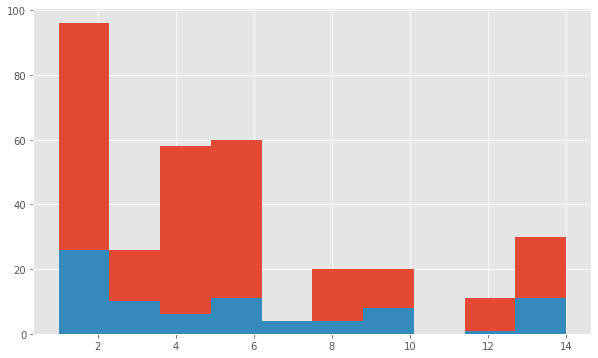

In [13]:
plt.figure(figsize=(10,6))
plt.hist(X_train_test[:,2]);
plt.hist(X_test_test[:,2]);

**3.2 At second approach we use StratifiedKFold in order to obtain same class proportions and same distribution**

In [14]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# enumerate the splits and summarize the distributions
for train_ix, test_ix in kfold.split(X, y):
    # select rows
    X_train, X_test = X[train_ix], X[test_ix]
    y_train, y_test = y[train_ix], y[test_ix]
    # summarize train and test composition
    train_0, train_1 = len(y_train[y_train==0]), len(y_train[y_train==1])
    test_0, test_1 = len(y_test[y_test==0]), len(y_test[y_test==1])
    print('>Train: 0=%d, 1=%d, Test: 0=%d, 1=%d' % (train_0, train_1, test_0, test_1))

>Train: 0=272, 1=52, Test: 0=68, 1=13
>Train: 0=272, 1=52, Test: 0=68, 1=13
>Train: 0=272, 1=52, Test: 0=68, 1=13
>Train: 0=272, 1=52, Test: 0=68, 1=13
>Train: 0=272, 1=52, Test: 0=68, 1=13


In [15]:
X_train.shape, X_test.shape

((324, 20), (81, 20))

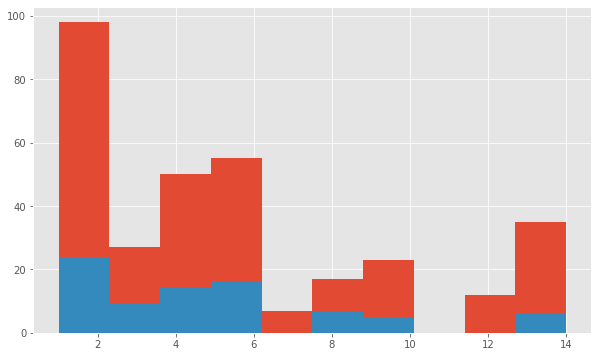

In [16]:
#sames distributions in train and test set
plt.figure(figsize=(10,6))
plt.hist(X_train[:,2]);
plt.hist(X_test[:,2]);

Changing the variables plots I have analyzed the distributions of the different variables in order to compare the two splits methods.

At first approach method, only with stratify= y, is not bad the distribution is too similar to second approach method, StratifiedKFold.

In any case I choose the second approach method because it makes cross-validation of all data.

**I have realized that in order to choose the columns for label encoding and scaling I need dataframe and the result of the split is an array. So I am going to pass X_train, X_test, y_train, y_test to dataframe.**

    -X_train:

In [17]:
X_train= pd.DataFrame(X_train, columns=data.drop('ReciLocal', axis='columns').columns)

In [18]:
#convert an array to DF, Dtype change all variables to object type, so I change it.

X_train[['Edad', 'Num_lesion_total', 'tratamientos_vez', 'Mts-tto', 'Mts-dco', 'numeroQtPrevias', 'VolPTV', 'BEDmax_test', 'BEDmim_test', 'VolHigSano', 'GradoTox']] = \
X_train[['Edad', 'Num_lesion_total', 'tratamientos_vez', 'Mts-tto', 'Mts-dco', 'numeroQtPrevias', 'VolPTV', 'BEDmax_test', 'BEDmim_test', 'VolHigSano', 'GradoTox']].astype(int)

In [19]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Sexo                   324 non-null    object
 1   Edad                   324 non-null    int32 
 2   Num_lesion_total       324 non-null    int32 
 3   tratamientos_vez       324 non-null    int32 
 4   tratatos_anteriomente  324 non-null    object
 5   Mts-tto                324 non-null    int32 
 6   Mts-dco                324 non-null    int32 
 7   Histología             324 non-null    object
 8   NeumotoraxHematoma     324 non-null    object
 9   numeroQtPrevias        324 non-null    int32 
 10  TtoLocalPrevio         324 non-null    object
 11  mtsSNC                 324 non-null    object
 12  mtdOtrosNiveles        324 non-null    object
 13  VolPTV                 324 non-null    int32 
 14  BEDmax_test            324 non-null    int32 
 15  BEDmim_test            

    -X_test:

In [20]:
X_test= pd.DataFrame(X_test, columns=data.drop('ReciLocal', axis='columns').columns)

In [21]:
X_test[['Edad', 'Num_lesion_total', 'tratamientos_vez', 'Mts-tto', 'Mts-dco', 'numeroQtPrevias', 'VolPTV', 'BEDmax_test', 'BEDmim_test', 'VolHigSano', 'GradoTox']] = \
X_test[['Edad', 'Num_lesion_total', 'tratamientos_vez', 'Mts-tto', 'Mts-dco', 'numeroQtPrevias', 'VolPTV', 'BEDmax_test', 'BEDmim_test', 'VolHigSano', 'GradoTox']].astype(int)

In [22]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Sexo                   81 non-null     object
 1   Edad                   81 non-null     int32 
 2   Num_lesion_total       81 non-null     int32 
 3   tratamientos_vez       81 non-null     int32 
 4   tratatos_anteriomente  81 non-null     object
 5   Mts-tto                81 non-null     int32 
 6   Mts-dco                81 non-null     int32 
 7   Histología             81 non-null     object
 8   NeumotoraxHematoma     81 non-null     object
 9   numeroQtPrevias        81 non-null     int32 
 10  TtoLocalPrevio         81 non-null     object
 11  mtsSNC                 81 non-null     object
 12  mtdOtrosNiveles        81 non-null     object
 13  VolPTV                 81 non-null     int32 
 14  BEDmax_test            81 non-null     int32 
 15  BEDmim_test            81

# 4. Encoding categorical data

I am going to apply **one hot encoding** because it assumes that there is no numerical ordering relationship between the different possibilities.

In addition, the size of the resulting dataframe is not large enough to take the curse ofdimensionality into account. In which case I would have chosen a different method (Target encoding or embedding).

In [23]:
#select categorical data
categorical_train = X_train.select_dtypes('object')
categorical_test = X_test.select_dtypes('object')

In [24]:
encoder = OneHotEncoder(handle_unknown='ignore')
categorical_train = encoder.fit_transform(categorical_train)
categorical_test = encoder.transform(categorical_test)

# 5. Scaling numerical data

Unlike the previous scalers, the centering and scaling statistics of RobustScaler is based on percentiles and are therefore not influenced by a few number of very large marginal outliers.

In [25]:
#select numerical data
numeric_train = X_train.select_dtypes('number')
numeric_test = X_test.select_dtypes('number')

In [26]:
scaler = RobustScaler()
numeric_train = scaler.fit_transform(numeric_train)
numeric_test = scaler.transform(numeric_test)

**Concatenate train and test data**

In [27]:
X_train = np.concatenate((numeric_train, categorical_train.todense()), axis=1)
X_test =  np.concatenate([numeric_test, categorical_test.todense()], axis=1)

In [28]:
X_train.shape, X_test.shape

((324, 45), (81, 45))

These are our final data, as far as we can see they are not very large.


### **Therefore, we now have the data ready to build and investigate a model capable of predicting whether or not the treatment will be successful depending on the patient's conditions.**

to deal with an unbalanced data set we will follow different approaches:

1. Data level approach
2. Ensemble models
3. Cost-sensitive approach

This approach consists of creating synthetic samples of the minority class (oversampling), reducing by different strategies some samples of the majority class or combining both.

Therefore, in this notebook I add the preprocessing of the data using these techniques.

# 6. Sampling Imbalanced data

    - Undersampling methods:
    
            Random Undersampling (RUS)
            Condensed Nearest Neighbours (CNN)
            Tomek Links (TOMEK)
            One Slide Selection (OSS)
            Edited Nearest Neighbour (ENN)
            Repeated Edited Nearest Neighbour (RENN)
            All K Nearest Neighbour s(KNN)
            Neighbourhood Cleaning rule (NCR)
            Near Miss (NM)
            Instance Hardness Threshold (IHT)
            
    - Oversampling methods:
    
            RandomOverSampler
            SMOTE
            ADASYN
            BorderlineSMOTE
            SVMSMOTE
            
    - Combination:
            
            SMOTEENN
            SMOTETomek
   

**We are going to analyze each sampling method by means of a plot and the size of each method applied. For this purpose, I represent two random variables**

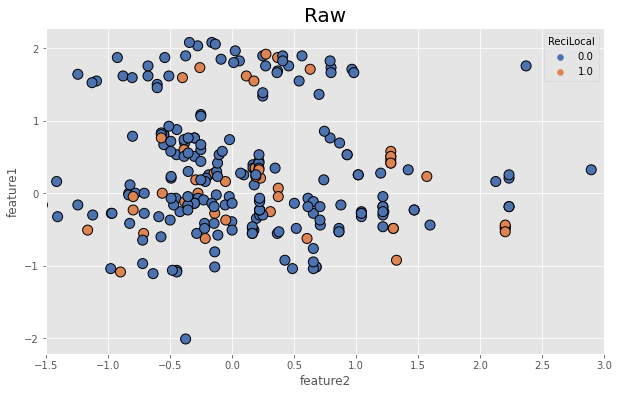

In [124]:

plt.figure(figsize=(10,6))
sns.scatterplot(data=pd.DataFrame(X_train), y=pd.DataFrame(X_train)[7], x= pd.DataFrame(X_train)[9], hue= y_train, linewidth=1, edgecolor='black', palette='deep', s=100)
plt.title('Raw', fontsize= 20)
plt.ylabel('feature1')
plt.xlabel('feature2')
plt.xlim(-1.5,3)
plt.show()

In [66]:
#Imbalanced dataset shape
X_train.shape, X_test.shape

((324, 45), (81, 45))

## 6.1 Undersampling methods

I create a dictionary with all undersampling methods:

In [77]:
undersampler_dict = {
    'random' : RandomUnderSampler(
    sampling_strategy='auto',
    random_state=42,
    replacement=False),
    
    'cnn' :  CondensedNearestNeighbour(
        sampling_strategy='auto', 
        random_state=42,
        n_neighbors=1,
        n_jobs=4),
    
    'tomek' : TomekLinks(
        sampling_strategy='auto', 
        n_jobs=4),
    
    'oss' : OneSidedSelection(
        sampling_strategy='auto',
        random_state= 42,
        n_neighbors=1,
        n_jobs=4),
    
    'enn' : EditedNearestNeighbours(
        sampling_strategy='auto', 
        n_neighbors=3,
        kind_sel='all', 
        n_jobs=4),
    
    'renn': RepeatedEditedNearestNeighbours(
        sampling_strategy='auto', 
        n_neighbors=3,
        kind_sel='all', 
        n_jobs=4,
        max_iter=100),
    
    'allknn' : AllKNN(
        sampling_strategy='auto', 
        n_neighbors=3,
        kind_sel='all', 
        n_jobs=4),
    
    'ncr' :  NeighbourhoodCleaningRule(
        sampling_strategy='auto',
        n_neighbors=3,
        kind_sel='all', 
        n_jobs=4,
        threshold_cleaning=0.5),
    
    'nm1' : NearMiss(
        sampling_strategy='auto', 
        version=1,
        n_neighbors=3, 
        n_jobs=4),
    
    'nm2':  NearMiss(
        sampling_strategy='auto', 
        version=2,
        n_neighbors=3, 
        n_jobs=4),
    
    'nm3' :  NearMiss(
        sampling_strategy='auto', 
        version=3,
        n_neighbors=3, 
        n_jobs=4),
    
    'iht' : InstanceHardnessThreshold(
        estimator=LogisticRegression(random_state=42),
        sampling_strategy='auto',
        random_state=42,
        n_jobs=4,
        cv = 3)
}

I want to show what each sampling technique does and the final size. So I create this function

In [131]:
def draw_sampling_undersampler(X_train, y_train):
    plt.figure(figsize=(10,6))
    sns.scatterplot(data=pd.DataFrame(X_train), y=pd.DataFrame(X_train)[7], x= pd.DataFrame(X_train)[9], hue= y_train, linewidth=1, edgecolor='black', palette='deep' ,s=100)
    plt.title(undersampler, fontsize= 20)
    plt.ylabel('feature1')
    plt.xlabel('feature2')
    plt.xlim(-1.5,3)
    plt.show()

random
104 104


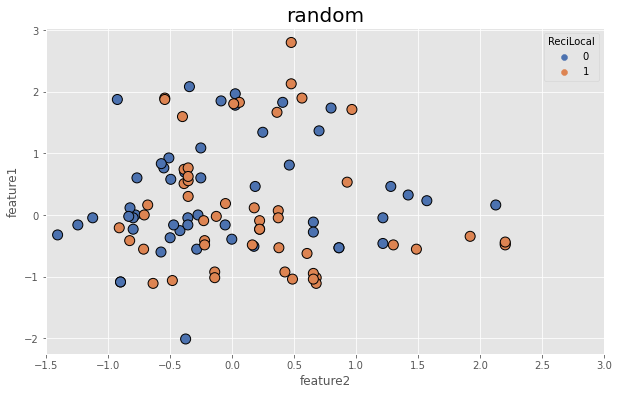

cnn
127 127


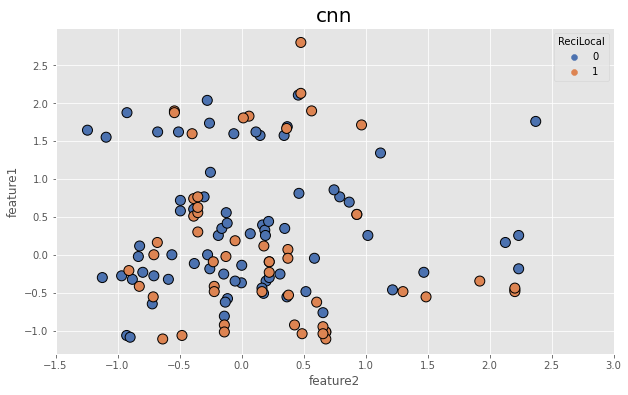

tomek
315 315


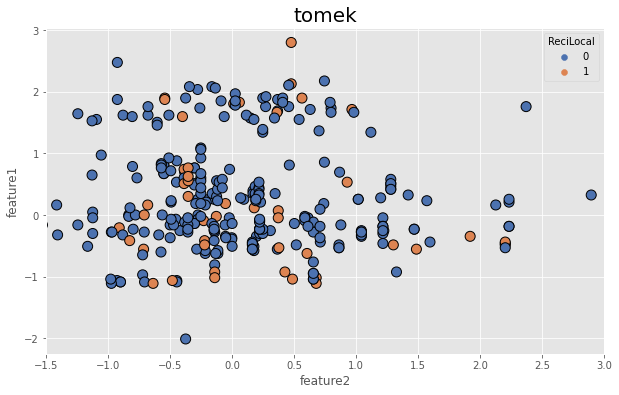

oss
312 312


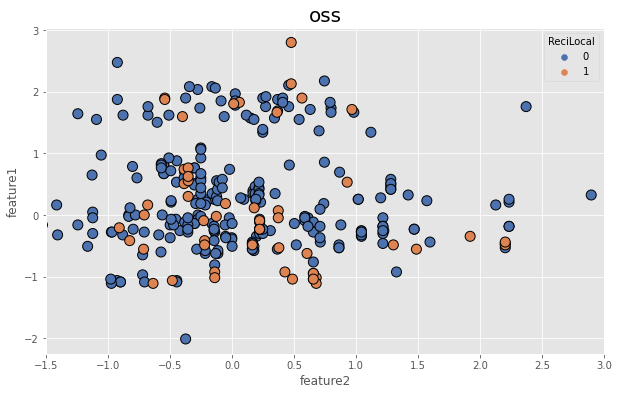

enn
256 256


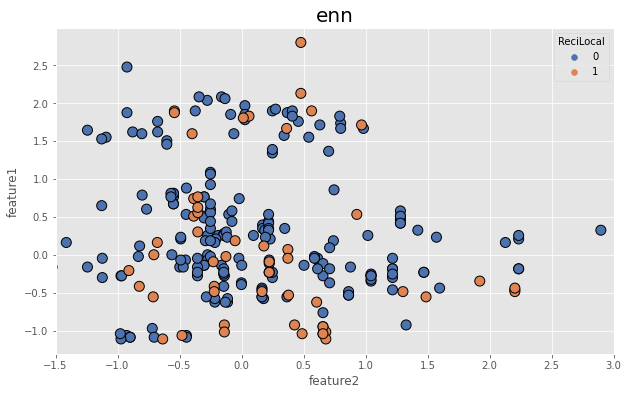

renn
219 219


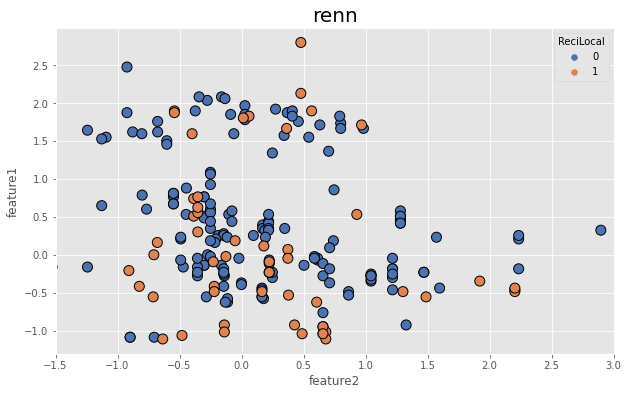

allknn
238 238


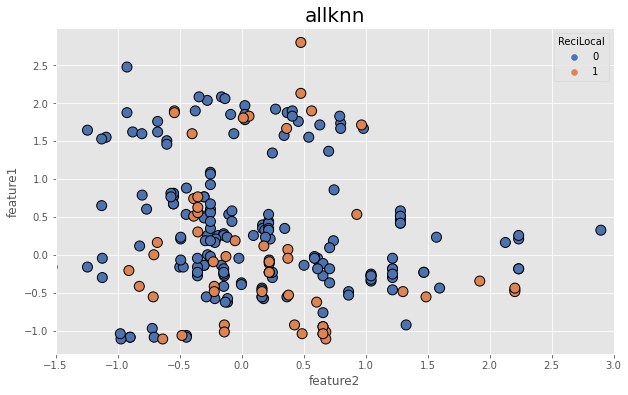

ncr
252 252


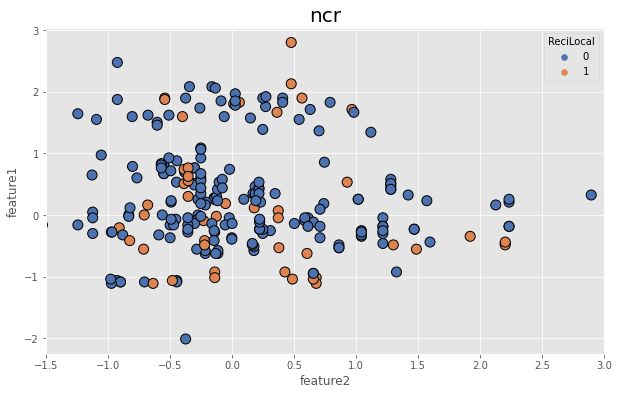

nm1
104 104


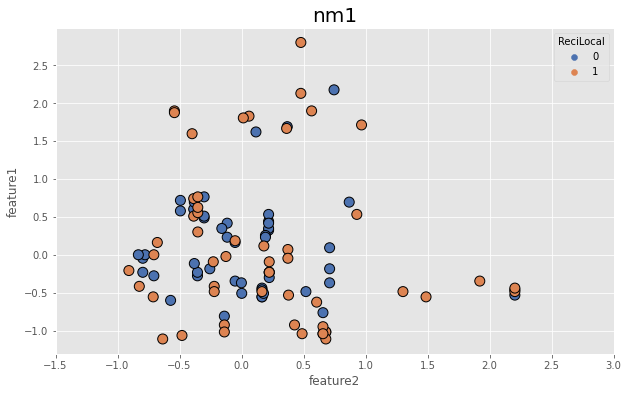

nm2
104 104


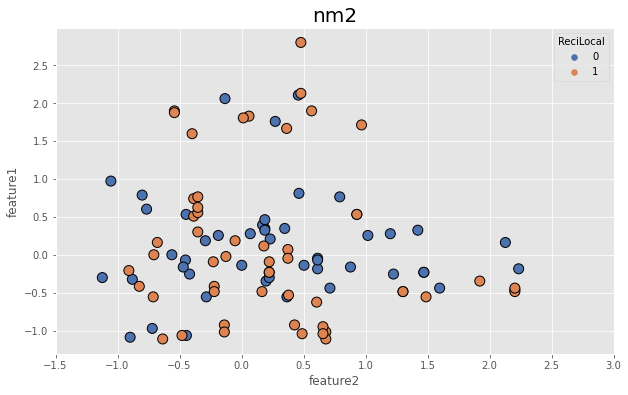

nm3
104 104


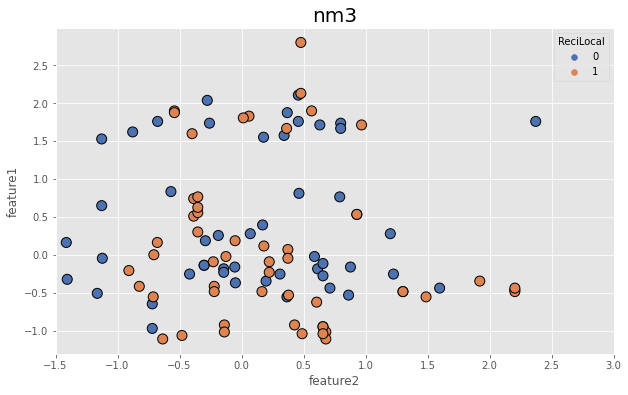

iht
104 104


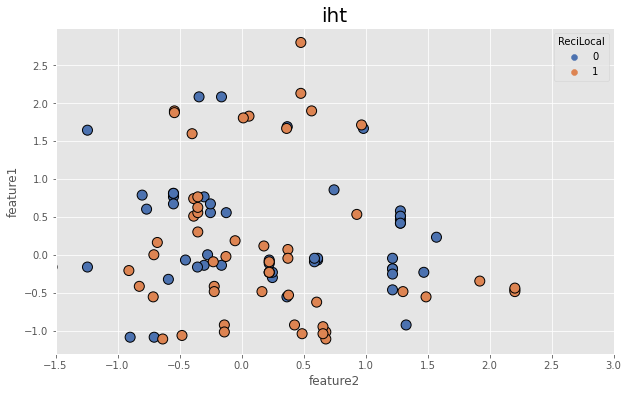

In [132]:
plots = {}
shapes_dict = {}

for undersampler in undersampler_dict.keys():
    print(undersampler)
    
    #resample
    X_resampled, y_resampled = undersampler_dict[undersampler].fit_resample(X_train, y_train)
    shapes = len(X_resampled),len(y_resampled)
    print(len(X_resampled),len(y_resampled) )
    
    #visualization
    draw_sampling_undersampler(X_resampled, y_resampled)
    
    #store results
    plots[undersampler] = ax
    shapes_dict[undersampler] = shapes
    
    
print()

## 6.2 Oversampling methods

In [134]:
oversampler_dict = {
    'random' : RandomOverSampler(
        sampling_strategy='auto', 
        random_state=0),
    
    'smote' : SMOTE(
        sampling_strategy='all', 
        random_state=0,
        k_neighbors=5,
        n_jobs = 4),
    
    'adasyn' : ADASYN(
    sampling_strategy='auto',
    random_state=0,
    n_neighbors=5,
    n_jobs=4),
    
    'border1' : BorderlineSMOTE(
    sampling_strategy='auto',
    random_state=0,
    k_neighbors=5,
    m_neighbors=10,
    kind='borderline-1',
    n_jobs=4),
    
    'border2' : BorderlineSMOTE(
    sampling_strategy='auto',
    random_state=0,
    k_neighbors=5,
    m_neighbors=10,
    kind='borderline-2',
    n_jobs=4),
    
    'svm' : SVMSMOTE(
        sampling_strategy='auto',
        random_state=0,
        k_neighbors=5,
        m_neighbors=10,
        n_jobs=4,
        svm_estimator=SVC(kernel='linear')),
}

In [137]:
def draw_sampling_oversampler(X_train, y_train):
    plt.figure(figsize=(10,6))
    sns.scatterplot(data=pd.DataFrame(X_train), y=pd.DataFrame(X_train)[7], x= pd.DataFrame(X_train)[9], hue= y_train, linewidth=1, edgecolor='black', palette='deep' ,s=100)
    plt.title(oversampler, fontsize= 20)
    plt.ylabel('feature1')
    plt.xlabel('feature2')
    plt.xlim(-1.5,3)
    plt.show()

random
544 544


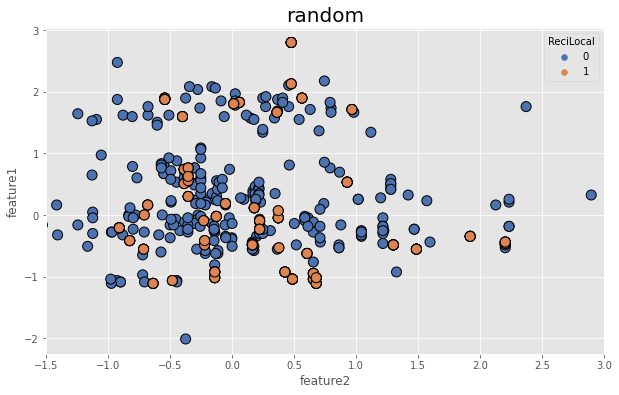

smote
544 544


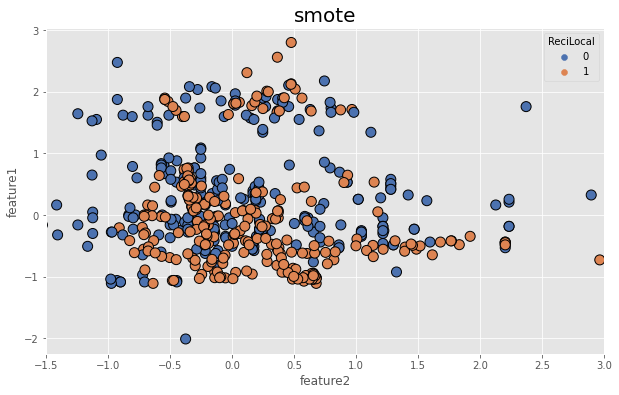

adasyn
552 552


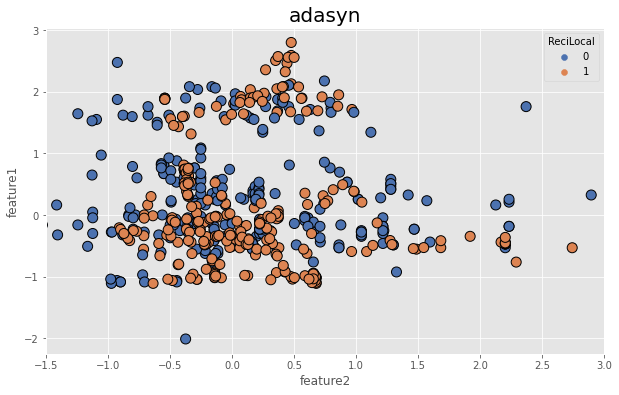

border1
544 544


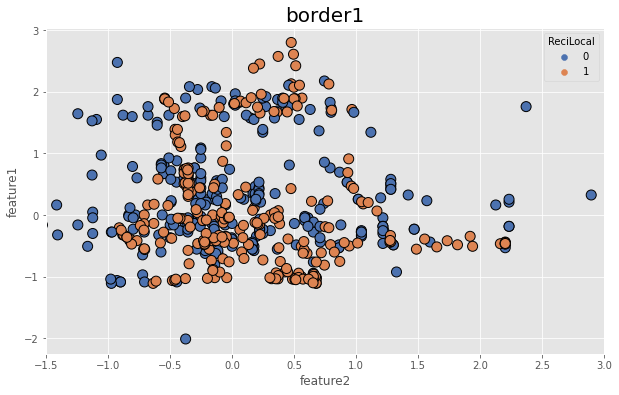

border2
543 543


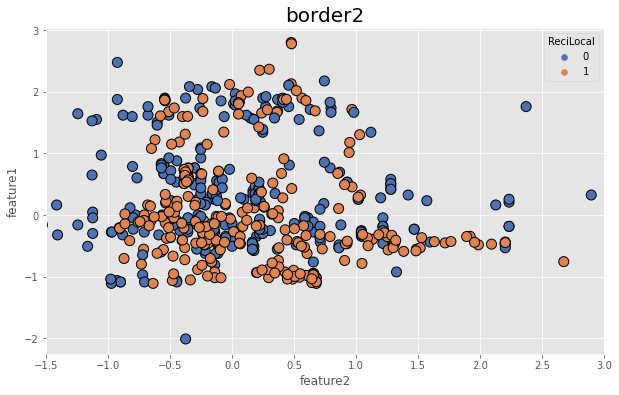

svm
455 455


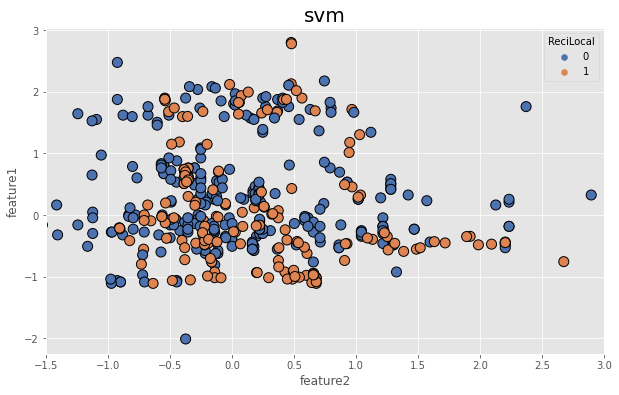

In [138]:
plots_o = {}
shapes_dict_o = {}


for oversampler in oversampler_dict.keys():
    print(oversampler)
    
    #resample
    X_resampled, y_resampled = oversampler_dict[oversampler].fit_resample(X_train, y_train)
    print(len(X_resampled),len(y_resampled) )
    
    #visualization
    draw_sampling_oversampler(X_resampled, y_resampled)

    #store results
    plots_o[oversampler] = ax
    shapes_dict_o[oversampler] = shapes
    
    
print()

## 6.3 Combination (over and undersampling)

In [141]:
under_oversampler_dict = {



    'smenn': SMOTEENN(
        sampling_strategy='auto',
        random_state=42,
        smote=SMOTE(sampling_strategy='auto', random_state=0, k_neighbors=5),
        enn=EditedNearestNeighbours(
            sampling_strategy='auto', n_neighbors=3, kind_sel='all'),
        n_jobs=4),

    'smtomek': SMOTETomek(
        sampling_strategy='auto',
        random_state=42,
        smote=SMOTE(sampling_strategy='auto', random_state=0, k_neighbors=5),
        tomek=TomekLinks(sampling_strategy='all'),
        n_jobs=4),

}

In [142]:
def draw_sampling_combine(X_train, y_train):
    plt.figure(figsize=(10,6))
    sns.scatterplot(data=pd.DataFrame(X_train), y=pd.DataFrame(X_train)[7], x= pd.DataFrame(X_train)[9], hue= y_train, linewidth=1, edgecolor='black', palette='deep' ,s=100)
    plt.title(combination, fontsize= 20)
    plt.ylabel('feature1')
    plt.xlabel('feature2')
    plt.xlim(-1.5,3)
    plt.show()

smenn
533 533


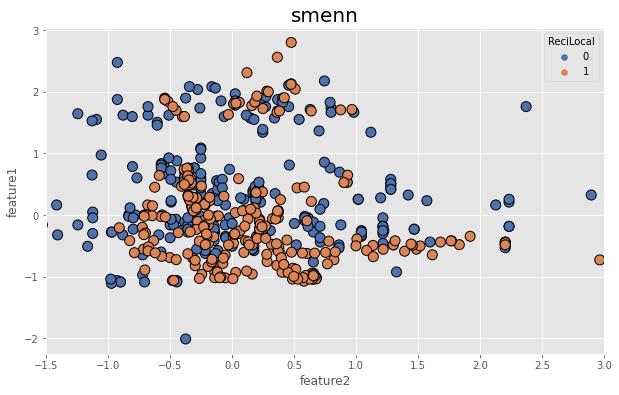

smtomek
540 540


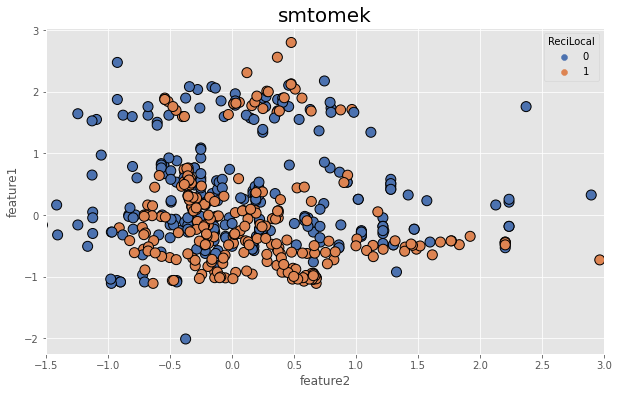

In [143]:
plots_comb = {}
shapes_dict_comb = {}


for combination in under_oversampler_dict.keys():
    print(combination)
    
    #resample
    X_resampled, y_resampled = under_oversampler_dict[combination].fit_resample(X_train, y_train)
    print(len(X_resampled),len(y_resampled) )
    
    #visualization
    draw_sampling_combine(X_resampled, y_resampled)
    
    
    #store results
    plots_comb[combination] = ax
    shapes_dict_comb[combination] = shapes
    
    
    
print()

Both combination techniques results almost equal

Finally we are going to save the raw data of train and test that we will use in the following notebooks

# Save data

In [30]:
pd.DataFrame(X_train).to_excel('X_train_step_2.xlsx', index=False)

In [31]:
pd.DataFrame(X_test).to_excel('X_test_step_2.xlsx', index=False)

In [32]:
pd.DataFrame(y_train).to_excel('y_train_step_2.xlsx', index=False)

In [33]:
pd.DataFrame(y_test).to_excel('y_test_step_2.xlsx', index=False)